# A basic time-series analysis

In [1]:
!pip install numpy

## Getting The Data

In [1]:
import requests

we will use econdb public dataset to demonstrate the use of numpy.
Let's work with the [US Quarterly GDP data from 1947Q1 to 2022Q4 in USD Millions scale](http://www.econdb.com/api/series/?page=1&search=gdp).

In [2]:
ticker = 'gdpus'
format = 'json'
api_url = 'https://www.econdb.com/api/series/%s/?format=%s' % (ticker, format)
print(api_url)
gdpus = requests.get(api_url).json()

https://www.econdb.com/api/series/gdpus/?format=json


let's also get the [US monthly population data from January 1952 to January 2023 in thousands people scale](https://www.econdb.com/series/POPUS/united-states-population/?from=2018-03-15&to=2023-03-15).

In [9]:
ticker = 'popus'
format = 'json'
api_url = 'https://www.econdb.com/api/series/%s/?format=%s' % (ticker, format)
popus = requests.get(api_url).json()

## Transform the Data

### A small flashforward to Pandas
to fix the dates between the two data sets

In [32]:
!pip install pandas

  Using cached pandas-1.5.3-cp310-cp310-macosx_11_0_arm64.whl (10.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 340.3 kB/s eta 0:00:00a 0:00:01


In [10]:
import pandas as pd
gdpus_df = pd.DataFrame.from_records(gdpus['data']).set_index('dates')['values']
popus_df = pd.DataFrame.from_records(popus['data']).set_index('dates')['values']
joint_df = pd.merge(gdpus_df, popus_df, left_index=True, right_index=True, how='inner', suffixes=('_gdpus', '_popus')).sort_index()
joint_df

,values_gdpus,values_popus
dates,,
1952-01-01,359820,156309
1952-04-01,361030,156943
1952-07-01,367701,157553
1952-10-01,380812,158306
1953-01-01,387980,158973
...,...,...
2021-10-01,24349120,332692
2022-01-01,24740480,332918
2022-04-01,25248476,333184


### Another flashforward to Matplotlib

In [12]:
import numpy as np

In [13]:
dates = np.array(joint_df.index)
gdpus = np.array(joint_df['values_gdpus'])
popus = np.array(joint_df['values_popus'])

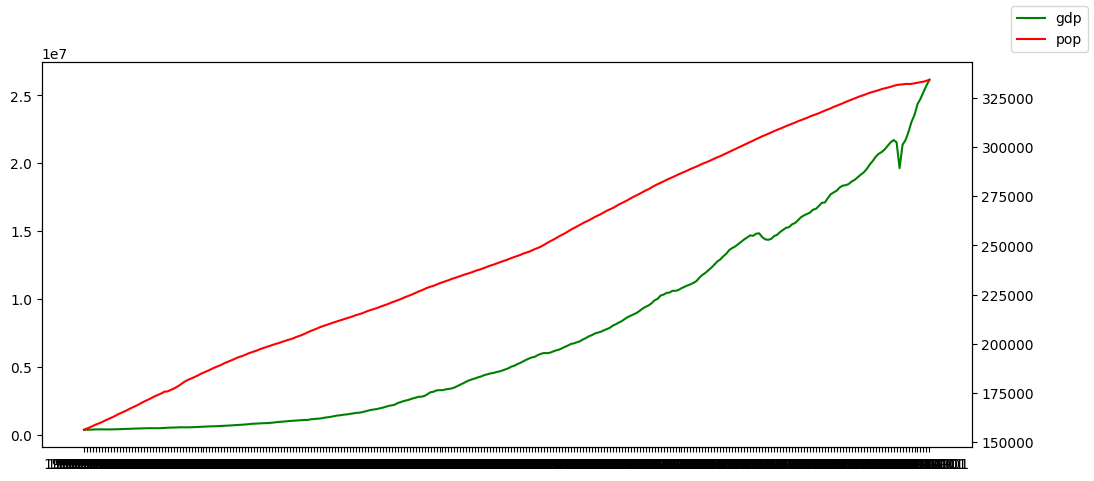

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.plot(dates, gdpus, label='gdp', color='green')
ax2.plot(dates, popus, label='pop', color='red')
fig.legend()
plt.show()

## Analyse the Data

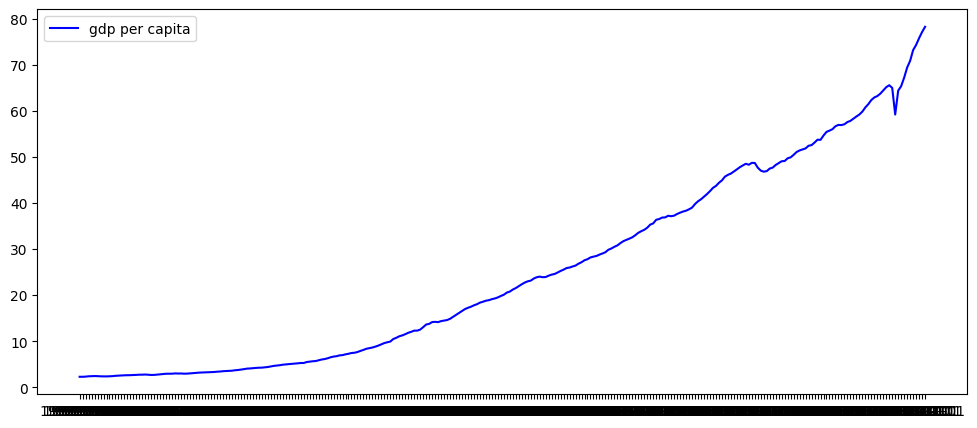

In [19]:
gdp_per_capita = gdpus / popus
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(dates, gdp_per_capita, label='gdp per capita', color='blue')
plt.legend()
plt.show()

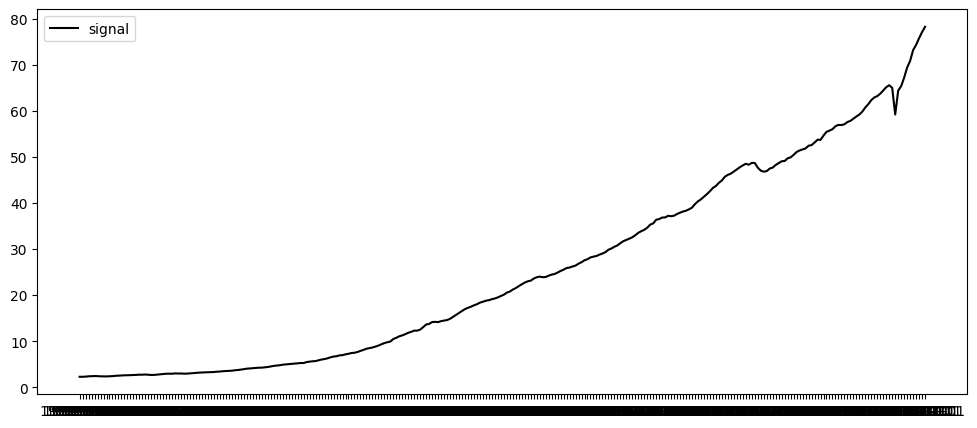

In [20]:
def plot_signal(signal, dates=dates, title='signal'):
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(dates, signal, label=title, color='black')
    plt.legend()
    plt.show()
plot_signal(gdp_per_capita)

In [24]:
np.min(np.gradient(gdp_per_capita))

-3.181219962571518

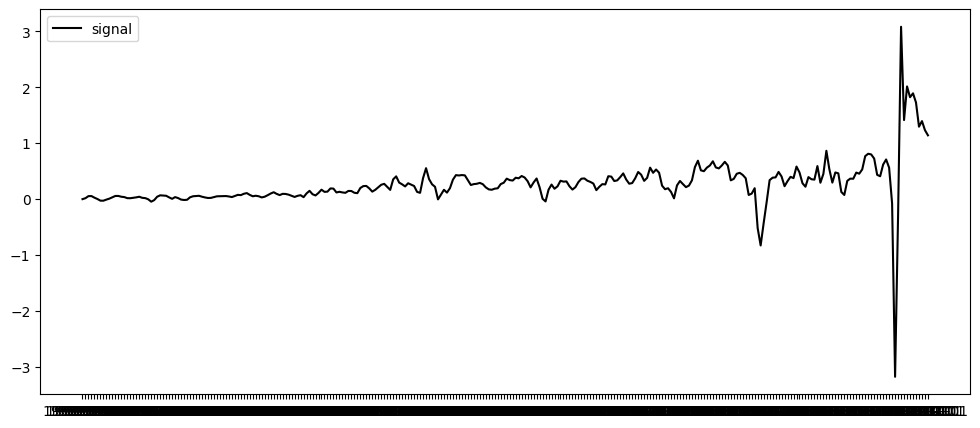

In [114]:
plot_signal(np.gradient(gdp_per_capita))

In [25]:
min(np.gradient(gdp_per_capita))

-3.181219962571518

In [115]:
print(np.gradient(gdp_per_capita).min())

-3.181219962571518


In [26]:
np.gradient(gdp_per_capita) == np.gradient(gdp_per_capita).min()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [27]:
np.where(np.gradient(gdp_per_capita) == np.gradient(gdp_per_capita).min())

(array([272]),)

In [28]:
dates[np.where(np.gradient(gdp_per_capita) == np.gradient(gdp_per_capita).min())[0]]

array(['2020-01-01'], dtype=object)